(0.0, 7000000.0)

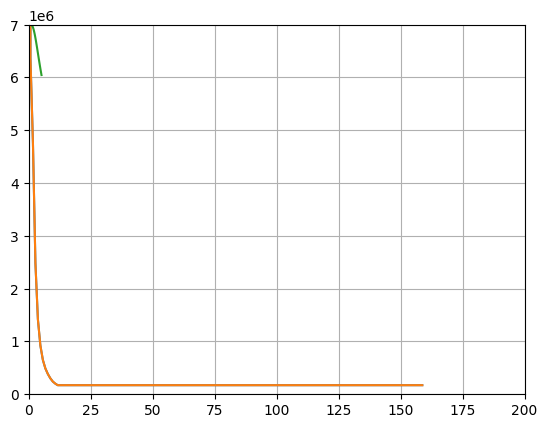

In [569]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('model_pellets_out.csv')
# df01 = pd.read_csv('model_pellets_01.csv')
# df1 = pd.read_csv('model_pellets_01.csv')
df_coarser = pd.read_csv('model_pellets_coarser.csv')
df_finer = pd.read_csv('model_pellets_finer.csv')
plt.plot(df['time'], df['inlet-p'])
# plt.plot(df1['time'], df1['inlet-p'])
# plt.plot(df01['time'], df01['inlet-p'])
plt.plot(df_coarser['time'], df_coarser['inlet-p'])
plt.plot(df_finer['time'], df_finer['inlet-p'])
plt.grid()
plt.xlim(0,200)
plt.ylim(0, 7e6)


In [570]:
import numpy as np
import pandas as pd
from itertools import permutations
import csv
 
start_value1= 0.005
end_value1 =  0.02


# Define the step size for the range
array = np.linspace(start_value1, end_value1, 40)

csv_file = 'porosities.csv'

with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['porosity'])
    writer.writerows(zip(array))

In [571]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path = 'stochastic_tools_out.json'

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['porosity']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']
df

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist()

 
# The first element of the list t is selected and ordered vertically
# t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in)
md_df = md_df.drop([3001], axis = 1)
md_df = md_df.T
md_df *= 1e-6
print('Modeling Results')
md_df
sub_set = md_df.iloc[:, 1:40]


Modeling Results


(0.0, 7.5)

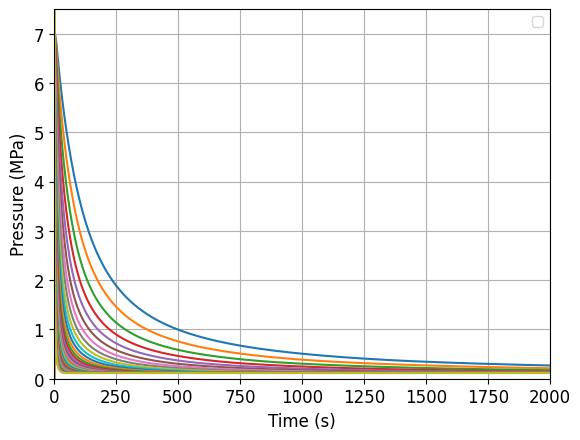

In [572]:

sub_set.plot(linestyle = '-', marker = '')
plt.legend([])
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.grid()
plt.xlim(0, 2000)
plt.ylim(0, 7.5)